# Genetic Algorithm and ML Classification

In [1]:
### Importing relevant libraries ###

import random
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
### Importing the Cleaned Heart Disease dataset

dataset = pd.read_csv('cleaned_heart_disease_dataset.csv')
dataset.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,2.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,3.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1.0,0


In [3]:
### Returning dimensionality of the Dataset ###

dataset.shape

(828, 13)

In [4]:
### Printing information regarding the heart disease dataset ###

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  828 non-null    int64  
 1   sex                  828 non-null    int64  
 2   chest_pain_type      828 non-null    int64  
 3   resting_bp           828 non-null    float64
 4   cholesterol          828 non-null    float64
 5   fasting_blood_sugar  828 non-null    float64
 6   restecg              828 non-null    float64
 7   max_heart_rate       828 non-null    float64
 8   ex_induced_angina    828 non-null    float64
 9   st_depression        828 non-null    float64
 10  slope                828 non-null    float64
 11  thalassemia          828 non-null    float64
 12  goal                 828 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 84.2 KB


In [5]:
### Displaying basic statistical details (description about the dataset) ###

dataset.describe()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,53.300725,0.799517,3.229469,129.724638,237.662440,0.143720,0.584541,137.833903,0.346618,0.777415,1.828502,1.451691,0.539855
std,9.481231,0.400604,0.932032,15.125961,38.908621,0.351017,0.801361,25.090035,0.476181,0.957354,0.510645,0.807363,0.498710
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,62.471818,0.000000,-2.600000,1.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,215.000000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,239.500000,0.000000,0.000000,138.000000,0.000000,0.500000,2.000000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,258.250000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.250000,1.000000
max,77.000000,1.000000,4.000000,165.000000,337.000000,1.000000,2.000000,202.000000,1.000000,3.700000,3.000000,3.000000,1.000000


In [6]:
### Returning dimensionality of the Dataset ###

dataset.shape

(828, 13)

### a) Feature Selection (Genetic Algorithm)

In [7]:
### Separating input features with the target variable ###

target_variable = dataset["goal"]
independent_features = dataset.drop(columns="goal")
independent_features

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,2.0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1.0
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,3.0
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1.0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
823,46,1,4,134.0,310.0,0.0,0.0,126.0,0.0,0.0,2.0,1.0
824,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,1.0
825,62,1,1,130.0,139.0,0.0,1.0,137.5,0.0,0.5,2.0,1.0
826,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,2.0


In [8]:
### Checking how many independent features we have ###

feature_size = independent_features.shape[1]
feature_size

12

In [9]:
### Creating a list of column numbers for independent features dataset ###

def total_features():
    features = []
    # including all the independent variables in the list "features"
    features = list(range(feature_size))
    return features

In [10]:
### Column Number list ###

features_list = total_features()
print(features_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:
### Selecting Features through Genetic Algorithm ###

# Creating a class to run Genetic Algorithm:
class Genetic_Algorithm:


    ############## Initialize variables and lists ##############
    def __init__(self):

        self.chromosome_size = feature_size
        self.population = []
        self.chromosome = []
        self.population_size = 20
        self.max_generation = 100
        self.optimal_score = 85
        self.bests = []


    ############## Create Random Chromosome ##############
    def createRandomChromosome(self):
        randomChromosome = []
        randomChromosome = random.choices([0, 1], k = self.chromosome_size)
        self.chromosome = randomChromosome
        return randomChromosome


    ############## Initial Population ##############
    def initialPopulation(self, population_size):
        initial_population = []
        for i in range(0, population_size):
            initial_population.insert(i, self.createRandomChromosome())
        self.population = initial_population
        return initial_population


    ############## Model's Score Calculation Function ##############
    def scoreCalculator(self, X, y):

        # Ten stratified K-folds cross-validation
        cv = StratifiedKFold(n_splits=10)

        # Building Random Forest classifier
        model = RandomForestClassifier(n_jobs=-1)

        # Using accuracy as the target class is well balanced
        scores = cross_val_score(model, X, y, scoring= 'accuracy', n_jobs=-1, cv=cv)

        # Returning the score
        return round(scores.mean() * 100, 3)


    ############## Fitness Function ##############
    def fitness(self, chromosome):
        fitness_values = []
        # Creating a selected feature subset to feed it to the model,
        # initially taking all independent features.
        features_subset = independent_features
        chromosome_fitness = 0

        # Creating a feature subset for RF classifier (scoring calc.)
        selected_features = [feature for feature, gene in zip(independent_features, chromosome) if gene == 1]
        features_subset = features_subset[selected_features]

        X = features_subset
        y = target_variable

        # Calculating the score for our selected feature subset using RF model
        chromosome_fitness = self.scoreCalculator(X, y)

        # Return the score
        return chromosome_fitness


    ############## Selecting Elite Chromosomes ##############
    def evaluation(self, population):

        # Selecting 20% elite chromosomes to create a robust population

        # loop through parents and calculate fitness
        best_pop = self.population_size // 5

        for i in range(len(population)):
            parent = population[i]
            ft = self.fitness(parent)
            self.bests.append((ft, parent))

        # sort the fitness list by fitness
        self.bests.sort(key=operator.itemgetter(0), reverse=True)
        self.best_p = self.bests[:best_pop]
        self.best_score = [x[0] for x in self.best_p]
        self.best_parent = [x[1] for x in self.best_p]
        return self.best_parent, self.best_score


    ############## Tournament Selection Function ##############
    def tournament_selection(self, population):
        winner = []
        selected = []
        evaluation = []
        fitness_values = []
        idx_best_individual = 0
        tournament_size = 2

        # Two rounds of tournament.
        rounds = 2

        # Each mutually exclusive tournament will have two random selected parents,
        # battling against each other to win
        for i in range(rounds):
            selected = random.choices(population, k=tournament_size)
            evaluation = [self.fitness(participant) for participant in selected]
            idx_best_individual = evaluation.index(max(evaluation))
            winner.append(selected[idx_best_individual])
            fitness_values.append((max(evaluation)))

        # Shuffling selected chromosomes, to enable random crossover
        random.shuffle(winner)

        return winner, fitness_values


    ############## Crossover Function: 2-point crossover ##############
    def crossover(self, selected, crossover_rate =  0.6):

        # extracting parents
        parentA = selected[0].copy()
        parentB = selected[1].copy()

        # Ensure both parents have the same length
        if len(parentA) != len(parentB):
            raise ValueError("Parents must have the same length.")

        # copying each parent to their children
        offspring1, offspring2 = parentA.copy(), parentB.copy()

        # generating a random number
        r = random.uniform(0, 1)

        # Perform crossover if crossover rate is more than the random number (r)
        if crossover_rate > r:

            # Randomly generating crossover points to exchange information.
            # Crossover point 1 should not be at the end of the string.
            point1 = random.randint(0, len(parentA)-1)
            point2 = random.randint(point1, len(parentA))

            # Crossing over using randomly generated crossover points.
            offspring1 = parentA[:point1] + parentB[point1:point2] + parentA[point2:]
            offspring2 = parentB[:point1] + parentA[point1:point2] + parentB[point2:]

        return offspring1, offspring2


    ############## Mutation Function: swap mutation ##############
    def mutation(self, child1, child2, mutation_rate = 0.1):

        # looping over the first child
        for i in range(len(child1)):
            # generating a random number
            r1 = random.uniform(0, 1)
            # If the random number (r1) is less than the mutation rate,
            # Exchange the bit at a random index (j) with the current bit (i).
            if r1 < mutation_rate:
                # Switch bits
                j = random.randint(0, len(child1)-1)
                temp = child1[i]
                child1[i] = child1[j]
                child1[j] = temp

        # looping over the second child
        for i in range(len(child2)):
            # generating a random number
            r2 = random.uniform(0, 1)
            # If the random number (r2) is less than the mutation rate,
            # Exchange the bit at a random index (j) with the current bit (i).
            if r2 < mutation_rate:
                # Switching bits
                j = random.randint(0, len(child2)-1)
                temp = child2[i]
                child2[i] = child2[j]
                child2[j] = temp
        return child1, child2


    ############## Create Next Generation ##############
    def create_next_generation(self, current_generation, generation_size):

        ### Initializing variables ###
        next_generation = []
        elite_parents, tournament_winner_parents = [], []
        new_offspring1, new_offspring2, new_offspring3, new_offspring4, = [], [], [], []
        mutated_children1, mutated_children2 = [], []
        fitness_values_elites, fitness_values_tournament_winners = [], []
        max_fitness_value_elite = 0
        max_fitness_value_tournament_winner = 0
        maximum_fitness_values_per_iteration = []
        maximum_fitness_value = 0
        winner = []

        ### Creating the next population ###

        # Returning selected 20% elite populations and their score/fitness values:
        elite_parents, fitness_values_elites = self.evaluation(current_generation)
        # Crossing over elite populations to create a hybrid in the next generation
        # To preserve the good properties of elites to next generations,
        # crossover the elites and tournament winners separately
        new_offspring1, new_offspring2 = self.crossover(elite_parents)
        # Appending the next generation with crossed-over populations:
        next_generation.append(new_offspring1)
        next_generation.append(new_offspring2)

        # While adding (crossedover/mutated) populations to the next generation,
        # ensuring its length doesn't exceeds the fixed generation size
        while len(next_generation) < generation_size:
            # Returning winner populations of the tournament and their score/fitness values:
            tournament_winner_parents, fitness_values_tournament_winners = self.tournament_selection(current_generation)

            # Crossing over tournament's winner populations to create a hybrid in the next generation
            new_offspring3, new_offspring4 = self.crossover(tournament_winner_parents)

            # Mutating only the tournament's winner parents offsprings and not the elite's parents offsprings to ensure robustness
            mutated_children1, mutated_children2 = self.mutation(new_offspring3, new_offspring4)

            # Appending the next generation with mutated populations:
            next_generation.append(mutated_children1)
            next_generation.append(mutated_children2)

            # Below code keeps track of the population with the highest fittness among all the populations in a generation:
            # 1. Checking the maximum population among elites:
            max_fitness_value_elite = max(fitness_values_elites)
            for i in range(len(fitness_values_elites)):
                if fitness_values_elites[i] == max_fitness_value_elite:
                    elite = list(elite_parents[i])

            # 2. Checking the maximum population among Tournaments' winners:
            max_fitness_value_tournament_winner = max(fitness_values_tournament_winners)
            for i in range(len(fitness_values_tournament_winners)):
                if fitness_values_tournament_winners[i] == max_fitness_value_tournament_winner:
                    tournament = list(tournament_winner_parents[i])

            # 3. Checking the maximum population among the maximum Tournament's winner and maximum elite
            # This is called the winner of a generation
            if max_fitness_value_elite >= max_fitness_value_tournament_winner:
                maximum_fitness_values_per_iteration.append(max_fitness_value_elite)
                winner = [elite]
            else:
                maximum_fitness_values_per_iteration.append(max_fitness_value_tournament_winner)
                winner = [tournament]

        maximum_fitness_value = max(maximum_fitness_values_per_iteration)

        # Returning the next generation,
        # the population with the highest fittest among all the populations in a generation,
        # and its score
        return next_generation, maximum_fitness_value, winner


    ############## Plot Fitness Scores Per Generation ##############
    def plot_fitness(self, x, y):

        ### Creating lineplot ###
        plt.plot(x, y)
        plt.xlabel("Generation")  # add X-axis label
        plt.ylabel("Fitness")  # add Y-axis label
        plt.title("Fitness Per Generation")  # add title
        plt.show()


    ############## Run Main Genetic Algorithm ##############
    def main_run(self):

        ### Initializing variables ###
        generation = 1
        found_optima = False
        maximum_fitness_value = []
        maximum_fitness_value_per_population = []
        fittest_chromosome = []
        final_maximum_fitness_value = 0
        winner = []
        stop = False

        ### Creating an initial random population ###
        current_population = self.initialPopulation(self.population_size)
        print("Initial Generation (Generation ", generation, "): ", current_population)

        # While generating next generation,
        # ensuring the generation count doesn't exceeds the maximum generation limit
        while generation < self.max_generation+1:

            # Incrementing the generation
            generation += 1

            # Creating the Next Generation
            current_population, maximum_fitness_value, winner = self.create_next_generation(current_population, self.population_size)
            print("Generation", generation, ":", current_population,
                  ">> ", "Score: ", maximum_fitness_value, "%")

            # Saving maximum fitness scores per population
            maximum_fitness_value_per_population.append(maximum_fitness_value)
            # Saving winner chromosomes per population
            fittest_chromosome.append(winner)

            # If any chromosome in current population is the optimal solution,
            # stop running any more generations
            for fitness in maximum_fitness_value_per_population:
                # Checking if the fitness score of any chromosome
                # in the current population matches with the optimal solution
                if fitness > self.optimal_score:
                    print("Optimal solution found in", generation-1)
                    found_optima = True
                    break
            # If matches, finish creating any more generations and return the solution
            if found_optima:
                break

            # If fitness scores are repeating since 8 generations, stop running any more generations:
            for i in range(len(maximum_fitness_value_per_population)):
                # Checking if any population in the next generation matches the optimal solution
                if i >= 8:
                    if ((maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-1]) and
                        (maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-2]) and
                        (maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-3]) and
                        (maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-4]) and
                        (maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-5]) and
                        (maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-6]) and
                        (maximum_fitness_value_per_population[i] == maximum_fitness_value_per_population[i-7])):

                        stop = True
            # If matches, finish creating any more generations and return the solution
            if stop == True:
                break

        # Below code keeps track of the chromosome with the highest fitness value among all generations:
        # Checking for the maximum fitness value among all the chromosomes of all generations:
        final_maximum_fitness_value = max(maximum_fitness_value_per_population)
        for i in range(len(maximum_fitness_value_per_population)):
            if maximum_fitness_value_per_population[i] == final_maximum_fitness_value:
                winner = fittest_chromosome[i]
        # Printing the number of generation and the winner population with its score/fitness value
        print("*** Completed ", generation, "Generations ***")
        print("The Winner Population with the Maximum Score ", final_maximum_fitness_value, "is:", winner)

        # Plotting maximum fitness scores per Generation:
        generations = list(range(1, generation))
        self.plot_fitness(generations, maximum_fitness_value_per_population)

        # Returning the winner chromosome (Genetic Algorithm's output)
        return winner

In [12]:
### Creating an object called ga of Genetic Algorithm class ###

ga = Genetic_Algorithm()

Initial Generation (Generation  1 ):  [[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1], [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1], [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1], [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]]
Generation 2 : [[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

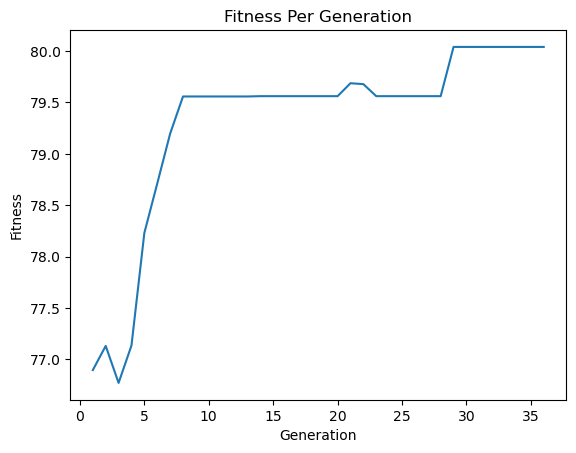

In [13]:
### Running Genetic Algorithm ###

winner = ga.main_run()

In [14]:
### Extracing a list from the 2D-list (nested list) called "winner" ###
winner = winner[0]
print(winner)

[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [15]:
### Transforming winner chromosome (GA's output) into column numbers ###

def transform_population_to_features_list(chromosome):
    independent_features_list = []
    for i in range(len(features_list)):
        if (chromosome[i]==1):
            independent_features_list.append(features_list[i])
    return independent_features_list

In [16]:
### Displaying column numbers ###

chromosome = winner
independent_features_list = transform_population_to_features_list(chromosome)
print(independent_features_list)
print("'",len(independent_features_list),"'", " Features are selected")

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11]
' 10 '  Features are selected


In [17]:
### Transforming column numbers into a new dataframe ("Features Subset") ###

def transform_features_list_to_features(independent_features_list):
    independent_features_subset = pd.DataFrame()
    index = 0
    for column_number, column_name in enumerate(independent_features.columns):
        for i in independent_features_list:
            if (column_number == i):
                independent_features_subset[index] = independent_features[column_name]
                independent_features_subset.rename(columns = {index : column_name}, inplace=True)
                index += 1
    return independent_features_subset

In [18]:
### Displaying the new dataframe ###

independent_features_subset = transform_features_list_to_features(independent_features_list)
independent_features_subset.head()

,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia
0,1,1,145.0,233.0,1.0,150.0,0.0,2.3,3.0,2.0
1,1,4,160.0,286.0,0.0,108.0,1.0,1.5,2.0,1.0
2,1,4,120.0,229.0,0.0,129.0,1.0,2.6,2.0,3.0
3,1,3,130.0,250.0,0.0,187.0,0.0,3.5,3.0,1.0
4,0,2,130.0,204.0,0.0,172.0,0.0,1.4,1.0,1.0


In [19]:
### Checking the size of our new dataframe ###

# The features subset contains less number of columns than in the full dataset,
# but the same number of rows
independent_features_subset.shape

(828, 10)

In [20]:
### Giving easy names to independent and target variables for further analysis

X = independent_features_subset
y = target_variable

## b) ML Classifiers

### 1) Boosting Ensemble Learning Model

#### i) Hyperparameter Tuning

##### Without GA

In [21]:
### Creating an ML model ###
model = AdaBoostClassifier()

### define the grid of values to search ###
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

### define the grid search procedure ###
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')

### Execute the grid search ###
grid_result = grid_search.fit(independent_features, target_variable)

### summarize the best score and configuration ###
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bo1 = grid_result.best_params_

### summarize all scores that were evaluated ###
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787129 using {'learning_rate': 0.1, 'n_estimators': 100}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.758272 (0.046967) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.758272 (0.046967) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.754658 (0.047232) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.779871 (0.075734) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.754658 (0.047232) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.781076

##### After GA

In [22]:
### Creating an ML model ###
model = AdaBoostClassifier()

### define the grid of values to search ###
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bo2 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.794373 using {'learning_rate': 1.0, 'n_estimators': 50}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.758272 (0.046967) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.758272 (0.046967) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.758272 (0.046967) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.758272 (0.046967) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.754658 (0.047232) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.782354 (0.067218) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.754658 (0.047232) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.782354 

#### ii) Train test split

##### Without GA

In [23]:
### Spliting dataset into train and test sets ###

X_train1, X_test1, y_train1, y_test1 = train_test_split(independent_features, target_variable, test_size=0.30)

In [24]:
### Normalizing data###

scaler = MinMaxScaler()    # create an object of class

scaler.fit(X_train1)       #  fit on training data

# Sale the training and testing data ###
X_train1_scaled = scaler.transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

# Convert the numpy array after transform into a dataframe #
X_train1 = pd.DataFrame(X_train1_scaled, columns = X_train1.columns)
X_test1 = pd.DataFrame(X_test1_scaled, columns = X_test1.columns)

In [25]:
### Creating the Boosting ensemble model ###
ada_boost1 = AdaBoostClassifier(**params_bo1)

### Fitting training data into the model ###
model_boost1 = ada_boost1.fit(X_train1, y_train1)

### Making predictions ###
yhat1 = model_boost1.predict(X_test1)

In [26]:
### Checking accuracy score ###

bo_acc1 = round(accuracy_score(y_test1, yhat1) * 100, 2)
print("Accuracy: ", bo_acc1)

Accuracy:  78.71


In [27]:
### Checking precision score ###

bo_pre1 = round(precision_score(y_test1, yhat1) * 100, 2)
print("Precision: ", bo_pre1)

Precision:  80.54


In [28]:
### Checking recall score ###

bo_re1 = round(recall_score(y_test1, yhat1) * 100, 2)
print("Recall: ", bo_re1)

Recall:  83.33


In [29]:
### Checking f1-score ###

bo_fs1 = round(f1_score(y_test1, yhat1) * 100, 2)
print("F1-score: ", bo_fs1)

F1-score:  81.91


Confusion matrix : 
 [[120  24]
 [ 29  76]]


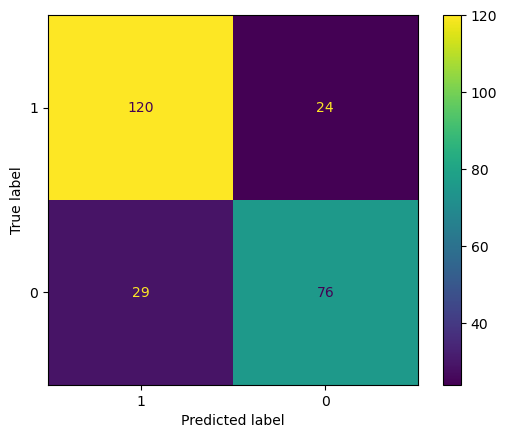

In [30]:
### Building a Confusion Matrix ###

matrix1 = confusion_matrix(y_test1, yhat1, labels=[1,0])
print('Confusion matrix : \n',matrix1)
cm1 = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix1, display_labels=[1, 0])
cm1.plot()
plt.show()

##### After GA

In [31]:
### Spliting dataset into train and test sets ###

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30)

In [32]:
### Normalizing data###

scaler = MinMaxScaler()    # create an object of class

scaler.fit(X_train2)       #  fit on training data

X_train2_scaled = scaler.transform(X_train2)    # transform model on both traing and testing data
X_test2_scaled = scaler.transform(X_test2)

# convert the numpy array after transform into a dataframe
X_train2 = pd.DataFrame(X_train2_scaled, columns = X_train2.columns)
X_test2 = pd.DataFrame(X_test2_scaled, columns = X_test2.columns)

In [33]:
### Creating the Boosting ensemble model ###
ada_boost2 = AdaBoostClassifier(**params_bo2)

### Fitting training data into the model ###
model_boost2 = ada_boost2.fit(X_train2, y_train2)

### Make predictions ###
yhat2 = model_boost2.predict(X_test2)

In [34]:
### Checking accuracy score ###

bo_acc2 = round(accuracy_score(y_test2, yhat2) * 100, 2)
print("Accuracy: ", bo_acc2)

Accuracy:  79.92


In [35]:
### Checking precision score ###

bo_pre2 = round(precision_score(y_test2, yhat2) * 100, 2)
print("Precision: ", bo_pre2)

Precision:  82.68


In [36]:
### Checking recall score ###

bo_re2 = round(recall_score(y_test2, yhat2) * 100, 2)
print("Recall: ", bo_re2)

Recall:  78.95


In [37]:
### Checking f1-score ###

bo_fs2 = round(f1_score(y_test2, yhat2) * 100, 2)
print("F1-score: ", bo_fs2)

F1-score:  80.77


Confusion matrix : 
 [[105  28]
 [ 22  94]]


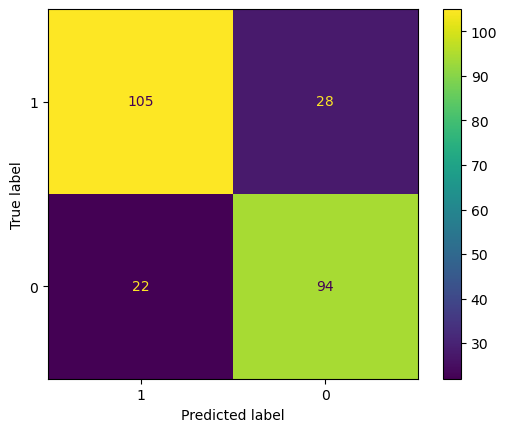

In [38]:
### Building a Confusion Matrix ###

matrix2 = confusion_matrix(y_test2, yhat2, labels=[1,0])
print('Confusion matrix : \n',matrix2)
cm2 = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix2, display_labels=[1, 0])
cm2.plot()
plt.show()

###### Performance Comparison RQ2:

Text(0, 0.5, 'Score')

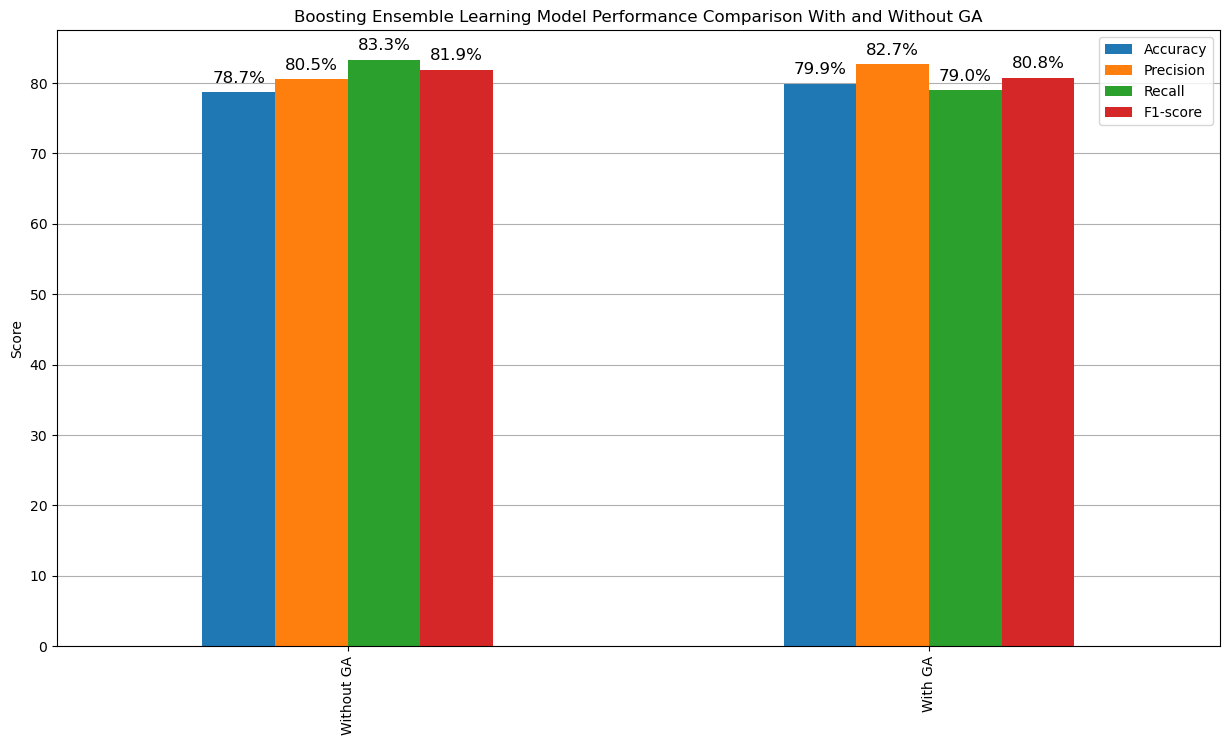

In [39]:
### Plotting bar chart: Compare Boosting EL performance without and with GA ###

plotdata = pd.DataFrame({

    "Accuracy":[bo_acc1, bo_acc2],

    "Precision":[bo_pre1, bo_pre2],

    "Recall":[bo_re1, bo_re2],

    "F1-score":[bo_fs1, bo_fs2]

    },

    index=["Without GA", "With GA"])

ax = plotdata.plot(kind="bar",figsize=(15, 8), grid = False)
# Customize the grid
ax.grid(axis = "y")
# Set the gridlines behind the plot
ax.set_axisbelow(True)

#Annotate text in bar plot
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
            '{:,.1f}'.format(bar.get_height())+ "%",
            ha='center', va='center',
            size=12 )

plt.title("Boosting Ensemble Learning Model Performance Comparison With and Without GA")

plt.ylabel("Score")

###### Summary:
Genetic algorithm slightly increased the performance of the AdaBoost ensemble learning model.

### 2) Blending Ensemble Learning Model

#### i) Hyperparameter Tuning

##### Without GA

In [40]:
### Hyperparameter Tuning SVM model (base model) to create best blending El ###

model = SVC()

# define the grid of values to search
grid = dict()
grid['C'] = [0.1, 1, 10, 100]
grid['gamma'] = [1, 0.1, 0.01, 0.001]
grid['kernel'] = ['rbf']

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv = kfold, scoring='accuracy', n_jobs = -1)

# execute the grid search
grid_result = grid_search.fit(independent_features, target_variable)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl1 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.728063 using {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.670071 (0.075923) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.538672 (0.013093) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.639921 (0.065967) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.677314 (0.074589) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.541081 (0.006049) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.545901 (0.018602) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.619498 (0.051968) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.695445 (0.086956) with: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.541081 (0.006049) with: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.545901 (0.018602) with: {'C': 100, 'gamma': 0.1, 'kernel': '

In [41]:
### Hyperparameter Tuning KNN model (base model) to create best blending EL ###
model = KNeighborsClassifier()

# define the grid of values to search
grid = dict()
grid['n_neighbors'] = [5,7,9,11,13,15]
grid['weights'] = ['uniform','distance']
grid['metric'] = ['minkowski','euclidean','manhattan']

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy', cv=kfold, n_jobs = -1)

# execute the grid search
grid_result = grid_search.fit(independent_features, target_variable)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl2 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.689465 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.627858 (0.059152) with: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
0.638760 (0.052816) with: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.644784 (0.064921) with: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
0.664105 (0.062791) with: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
0.637570 (0.060241) with: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
0.650911 (0.051061) with: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
0.653247 (0.056682) with: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
0.660535 (0.062802) with: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
0.658081 (0.073001) with: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}
0.671378 (0.072866) with: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}
0.658

In [42]:
### Hyperparameter Tuning DT model (base model) to create best blending EL ###
model = DecisionTreeClassifier()

# define the grid of values to search
grid = dict()
grid['max_depth'] = [2, 3, 5, 10, 20]
grid['min_samples_leaf'] = [5, 10, 20, 50, 100]
grid['criterion'] = ["gini", "entropy"]

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=kfold, n_jobs=-1, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(independent_features, target_variable)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl3 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.747267 using {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}
0.732795 (0.085850) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.732795 (0.085850) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.732795 (0.085850) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.741228 (0.085900) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.742448 (0.082666) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.735248 (0.082150) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.726800 (0.084385) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.735248 (0.086790) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.727946 (0.091903) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.742448 (0.082666) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.725580 (0.075035) with: {'criteri

In [43]:
### Hyperparameter Tuning RF model (base model) to create best blending EL ###

model = RandomForestClassifier()

# define the grid of values to search
grid = dict()
grid['max_depth'] = [3, 6, 9]
grid['n_estimators'] = [50, 100, 150]
grid['max_features'] = ['sqrt', 'log2']
grid['min_samples_split'] = [2, 5, 10]

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=kfold, n_jobs=-1, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(independent_features, target_variable)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl4 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793168 using {'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
0.789553 (0.079940) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
0.775037 (0.086067) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
0.773891 (0.078646) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
0.777461 (0.084650) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}
0.779856 (0.086553) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
0.767852 (0.075818) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
0.778710 (0.069696) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
0.778710 (0.072363) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100

In [44]:
### Hyperparameter Tuning Gradient Boosting model (base model) to create the best blending EL ###

model = GradientBoostingClassifier()

# define the grid of values to search
parameters = {
    'max_depth': range(5,9,1),
    'min_samples_split': range(400,600,100)
    }

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=kfold,  n_jobs=-1, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(independent_features, target_variable)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl5 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795577 using {'max_depth': 7, 'min_samples_split': 500}
0.770217 (0.080220) with: {'max_depth': 5, 'min_samples_split': 400}
0.791963 (0.078045) with: {'max_depth': 5, 'min_samples_split': 500}
0.775037 (0.081037) with: {'max_depth': 6, 'min_samples_split': 400}
0.788349 (0.075828) with: {'max_depth': 6, 'min_samples_split': 500}
0.781105 (0.078882) with: {'max_depth': 7, 'min_samples_split': 400}
0.795577 (0.080939) with: {'max_depth': 7, 'min_samples_split': 500}
0.775066 (0.076044) with: {'max_depth': 8, 'min_samples_split': 400}
0.794373 (0.079762) with: {'max_depth': 8, 'min_samples_split': 500}


##### After GA

In [45]:
### Hyperparameter Tuning SVM model (base model) to create best blending EL ###
model = SVC()

# define the grid of values to search
grid = dict()
grid['C'] = [0.1, 1, 100]
grid['gamma'] = [1, 0.1, 0.01]
grid['kernel'] = ['rbf']

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv = kfold, scoring='accuracy', n_jobs = -1)

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl6 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.653277 using {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.539847 (0.003919) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.541067 (0.007058) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.559198 (0.031341) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.653277 (0.064650) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.539847 (0.006663) with: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.549574 (0.034640) with: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.635263 (0.066206) with: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [46]:
### Hyperparameter Tuning KNN model (base model) to create best blending EL ###

model = KNeighborsClassifier()

# define the grid of values to search
grid = dict()
grid['n_neighbors'] = [5,7,9,11,13,15]
grid['weights'] = ['uniform','distance']
grid['metric'] = ['minkowski','euclidean','manhattan']

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy', cv = kfold, n_jobs = -1)

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl7 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.693080 using {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
0.639950 (0.061951) with: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
0.646048 (0.068825) with: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.649559 (0.070475) with: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
0.644769 (0.070072) with: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
0.653188 (0.075811) with: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
0.660461 (0.070148) with: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
0.668939 (0.071032) with: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
0.667778 (0.065402) with: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
0.664164 (0.065420) with: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}
0.667778 (0.074002) with: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}
0.66

In [47]:
### Hyperparameter Tuning DT model (base model) to create best blending EL ###

model = DecisionTreeClassifier()

# define the grid of values to search
grid = dict()
grid['max_depth'] = [2, 3, 5, 10, 20]
grid['min_samples_leaf'] = [5, 10, 20, 50, 100]
grid['criterion'] = ["gini", "entropy"]

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=kfold, n_jobs=-1, scoring = "accuracy")

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl8 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.761887 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.742492 (0.070130) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.742492 (0.070130) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.742492 (0.070130) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.748516 (0.070772) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.758272 (0.046967) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.720732 (0.087932) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.717117 (0.087354) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.721937 (0.090795) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.718278 (0.095654) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.761887 (0.050895) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.738804 (0.092406) with: {'criterio

In [48]:
### Hyperparameter Tuning RF model (base model) to create best blending EL ###

model = RandomForestClassifier()

# define the grid of values to search
grid = dict()
grid['max_depth'] = [3, 6, 9]
grid['n_estimators'] = [50, 100, 150]
grid['max_features'] = ['sqrt', 'log2']
grid['min_samples_split'] = [2, 5, 10]

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs = -1)

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl9 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795651 using {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
0.784734 (0.073564) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
0.782280 (0.078064) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
0.781090 (0.078050) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
0.779900 (0.076316) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}
0.779929 (0.068744) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
0.784749 (0.072479) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
0.795651 (0.066536) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
0.789612 (0.065187) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100

In [49]:
### Hyperparameter Tuning Gradient Boosting model (base model) to create the best blending EL ###

model = GradientBoostingClassifier()

# define the grid of values to search
parameters = {
    'max_depth': range(5,9,1),
    'min_samples_split': range(400,600,100)
    }

### defining ten stratified K-folds cross-validation ###
kfold = StratifiedKFold(n_splits=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=kfold,  n_jobs=-1, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params_bl10 = grid_result.best_params_

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

### Displaying scores' means, stds and parameters ###
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.794358 using {'max_depth': 5, 'min_samples_split': 500}
0.790743 (0.082502) with: {'max_depth': 5, 'min_samples_split': 400}
0.794358 (0.079300) with: {'max_depth': 5, 'min_samples_split': 500}
0.793138 (0.086122) with: {'max_depth': 6, 'min_samples_split': 400}
0.790729 (0.085353) with: {'max_depth': 6, 'min_samples_split': 500}
0.790743 (0.083897) with: {'max_depth': 7, 'min_samples_split': 400}
0.790729 (0.084327) with: {'max_depth': 7, 'min_samples_split': 500}
0.790714 (0.088113) with: {'max_depth': 8, 'min_samples_split': 400}
0.793138 (0.085784) with: {'max_depth': 8, 'min_samples_split': 500}


#### ii) Building Blending Ensemble

##### Before GA

************ Blending Performance Metrics Without Applying GA ************
Blending Accuracy: 82.400
Blending Precision: 83.333
Blending Recall: 85.714
Blending F1-score: 84.507
Blending Confusion matrix : 



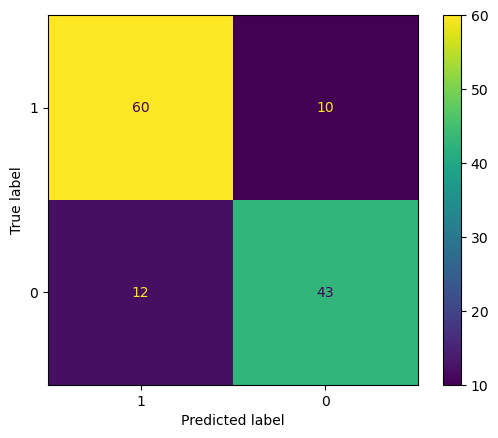

In [50]:
### A class to run blending EL model before applying genetic algorithm ###

class BlendingEnsembleBeforeGA:

    ### Initialising class variables ###
    def __init__(self):
        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None
        self.weak_learners = None

    ### Getting training, validation and testing datasets ready for blending ###
    def train_data(self):

        # split dataset into train and test sets
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(independent_features, target_variable, test_size=0.15)
        # split training set into train and validation sets
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size=0.15)


        ### Normalizing data ###
        scaler = MinMaxScaler()    # create an object of class

        scaler.fit(self.x_train)       #  fit on training data

        # transform model on both traing and testing data
        x_train_scaled = scaler.transform(self.x_train)
        x_test_scaled = scaler.transform(self.x_test)
        x_val_scaled = scaler.transform(self.x_val)

        # convert the numpy array after transform into a dataframe
        self.x_train = pd.DataFrame(x_train_scaled, columns = self.x_train.columns)
        self.x_test = pd.DataFrame(x_test_scaled, columns = self.x_test.columns)
        self.x_val = pd.DataFrame(x_val_scaled, columns = self.x_val.columns)

    ### Main blending function ###
    def MainBlending(self):

        ### Define weak learners or base models ###
        self.weak_learners = [('svm', SVC(**params_bl1)),
                         ('knn', KNeighborsClassifier(**params_bl2)),
                         ('dt', DecisionTreeClassifier(**params_bl3)),
                         ('rf', RandomForestClassifier(**params_bl4)),
                         ('gb', GradientBoostingClassifier(**params_bl5))]

        # Final learner or meta model
        final_learner = LogisticRegression()

        train_meta_model = None
        test_meta_model = None

        ### Start blending ###
        for clf_id, clf in self.weak_learners:

            # Predictions for each classifier
            val_predictions, test_predictions = self.train_level_1(clf)

            # Stack predictions which will form the input data for the meta model
            if isinstance(train_meta_model, np.ndarray):
                train_meta_model = np.vstack((train_meta_model, val_predictions))
            else:
                train_meta_model = val_predictions

            # Stack predictions from test set which will form test data for meta model
            if isinstance(test_meta_model, np.ndarray):
                test_meta_model = np.vstack((test_meta_model, test_predictions))
            else:
                test_meta_model = test_predictions

        # Transpose train_meta_model
        train_meta_model = train_meta_model.T

        # Transpose test_meta_model
        test_meta_model = test_meta_model.T

        # Training level 2
        self.train_level_2(final_learner, train_meta_model, test_meta_model)


    ### Training level 1 ###
    def train_level_1(self, clf):
        # Train with base x_train
        clf.fit(self.x_train, self.y_train)

        # Generate predictions for the holdout set (validation).
        # These predictions will build the input for the meta model.
        val_predictions = clf.predict(self.x_val)

        # Generate predictions for original test set.
        # These predictions will be used to test the meta model.
        test_predictions = clf.predict(self.x_test)

        return val_predictions, test_predictions

    ### Training level 2 ###
    def train_level_2(self, final_learner, train_meta_model, test_meta_model):
        # Training is carried out with final learner or meta model
        final_learner.fit(train_meta_model, self.y_val)

        ### Getting performance results from meta_model ###
        print('************ Blending Performance Metrics Without Applying GA ************')
        global bl_acc1, bl_pre1, bl_re1, bl_fs1
        ### Checking accuracy score ###
        bl_acc1 = final_learner.score(test_meta_model, self.y_test) * 100
        # For rest of the metrics, predicting test meta data
        test_predictions = final_learner.predict(test_meta_model)
        ### Checking precision score ###
        bl_pre1 = precision_score(self.y_test, test_predictions) * 100
        ### Checking recall score ###
        bl_re1 = recall_score(self.y_test, test_predictions) * 100
        ### Checking f1-score ###
        bl_fs1 = f1_score(self.y_test, test_predictions) * 100
        ### Checking confusion matrix ###
        matrix3 = confusion_matrix(self.y_test, test_predictions, labels=[1,0])

        ### Printing scores ###
        print('Blending Accuracy: %.3f' % (bl_acc1))
        print('Blending Precision: %.3f' % (bl_pre1))
        print('Blending Recall: %.3f' % (bl_re1))
        print('Blending F1-score: %.3f' % (bl_fs1))
        
        ### Building a Confusion Matrix ###
        cm3 = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix3, display_labels=[1, 0])
        print('Blending Confusion matrix : \n')
        cm3.plot()
        plt.show()

if __name__ == "__main__":
    blendingEnsemble1 = BlendingEnsembleBeforeGA()
    blendingEnsemble1.train_data()
    blendingEnsemble1.MainBlending()

##### After GA

************ Blending Performance Metrics After Applying GA ************
Blending Accuracy: 85.600
Blending Precision: 85.714
Blending Recall: 88.235
Blending F1-score: 86.957
Blending Confusion matrix : 



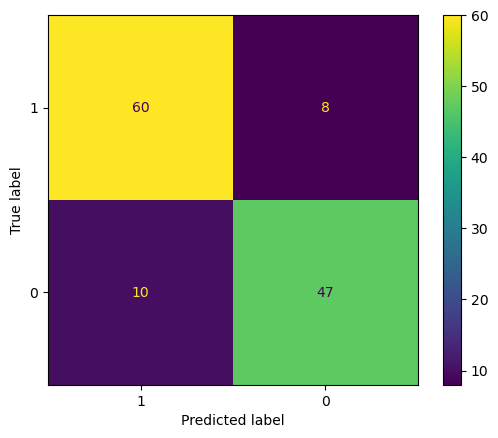

In [51]:
### A class to run blending EL model after applying genetic algorithm ###

class BlendingEnsembleAfterGA:

    ### Initialising class variables ###
    def __init__(self):
        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None
        self.weak_learners = None

    ### Getting training, validation and testing datasets ready for blending ###
    def train_data(self):

        # split dataset into train and test sets
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(independent_features, target_variable, test_size=0.15)
        # split training set into train and validation sets
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size=0.15)


        ### Normalizing data###
        scaler = MinMaxScaler()    # create an object of class

        scaler.fit(self.x_train)       #  fit on training data

        # transform model on both traing and testing data
        x_train_scaled = scaler.transform(self.x_train)
        x_test_scaled = scaler.transform(self.x_test)
        x_val_scaled = scaler.transform(self.x_val)

        # convert the numpy array after transform into a dataframe
        self.x_train = pd.DataFrame(x_train_scaled, columns = self.x_train.columns)
        self.x_test = pd.DataFrame(x_test_scaled, columns = self.x_test.columns)
        self.x_val = pd.DataFrame(x_val_scaled, columns = self.x_val.columns)

    ### Main blending function ###
    def MainBlending(self):

        ### Defining weak learners or base models ###
        self.weak_learners = [('svm', SVC(**params_bl6)),
                         ('knn', KNeighborsClassifier(**params_bl7)),
                         ('dt', DecisionTreeClassifier(**params_bl8)),
                         ('rf', RandomForestClassifier(**params_bl9)),
                         ('gb', GradientBoostingClassifier(**params_bl10))]

        # Final learner or meta model
        final_learner = LogisticRegression()

        train_meta_model = None
        test_meta_model = None

        ### Start blending ###
        for clf_id, clf in self.weak_learners:

            # Predictions for each classifier
            val_predictions, test_predictions = self.train_level_1(clf)

            # Stack predictions which will form the input data for the meta model
            if isinstance(train_meta_model, np.ndarray):
                train_meta_model = np.vstack((train_meta_model, val_predictions))
            else:
                train_meta_model = val_predictions

            # Stack predictions from test set which will form test data for meta model
            if isinstance(test_meta_model, np.ndarray):
                test_meta_model = np.vstack((test_meta_model, test_predictions))
            else:
                test_meta_model = test_predictions

        # Transpose train_meta_model
        train_meta_model = train_meta_model.T

        # Transpose test_meta_model
        test_meta_model = test_meta_model.T

        # Training level 2
        self.train_level_2(final_learner, train_meta_model, test_meta_model)


    ### Training level 1 ###
    def train_level_1(self, clf):

        # Train with base x_train
        clf.fit(self.x_train, self.y_train)

        # Generate predictions for the holdout set (validation).
        # These predictions will build the input for the meta model.
        val_predictions = clf.predict(self.x_val)

        # Generate predictions for original test set.
        # These predictions will be used to test the meta model.
        test_predictions = clf.predict(self.x_test)

        return val_predictions, test_predictions

    ### Training level 2 ###
    def train_level_2(self, final_learner, train_meta_model, test_meta_model):

        # Training is carried out with final learner or meta model
        final_learner.fit(train_meta_model, self.y_val)

        # Getting performance results from meta_model
        print('************ Blending Performance Metrics After Applying GA ************')
        global bl_acc2, bl_pre2, bl_re2, bl_fs2

        ### Checking accuracy score ###
        bl_acc2 = final_learner.score(test_meta_model, self.y_test) * 100
        # For rest of the metrics, predicting test meta data
        test_predictions = final_learner.predict(test_meta_model)
        ### Checking precision score ###
        bl_pre2 = precision_score(self.y_test, test_predictions) * 100
        ### Checking recall score ###
        bl_re2 = recall_score(self.y_test, test_predictions) * 100
        ### Checking f1 score ###
        bl_fs2 = f1_score(self.y_test, test_predictions) * 100
        ### Checking confusion matrix ###
        matrix4 = confusion_matrix(self.y_test, test_predictions, labels=[1,0])

        ### Printing scores ###
        print('Blending Accuracy: %.3f' % (bl_acc2))
        print('Blending Precision: %.3f' % (bl_pre2))
        print('Blending Recall: %.3f' % (bl_re2))
        print('Blending F1-score: %.3f' % (bl_fs2))
        
        ### Building a Confusion Matrix ###
        cm4 = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix4, display_labels=[1, 0])
        print('Blending Confusion matrix : \n')
        cm4.plot()
        plt.show()

if __name__ == "__main__":
    blendingEnsemble2 = BlendingEnsembleAfterGA()
    blendingEnsemble2.train_data()
    blendingEnsemble2.MainBlending()

###### Performance Comparison RQ3:

Text(0, 0.5, 'Score')

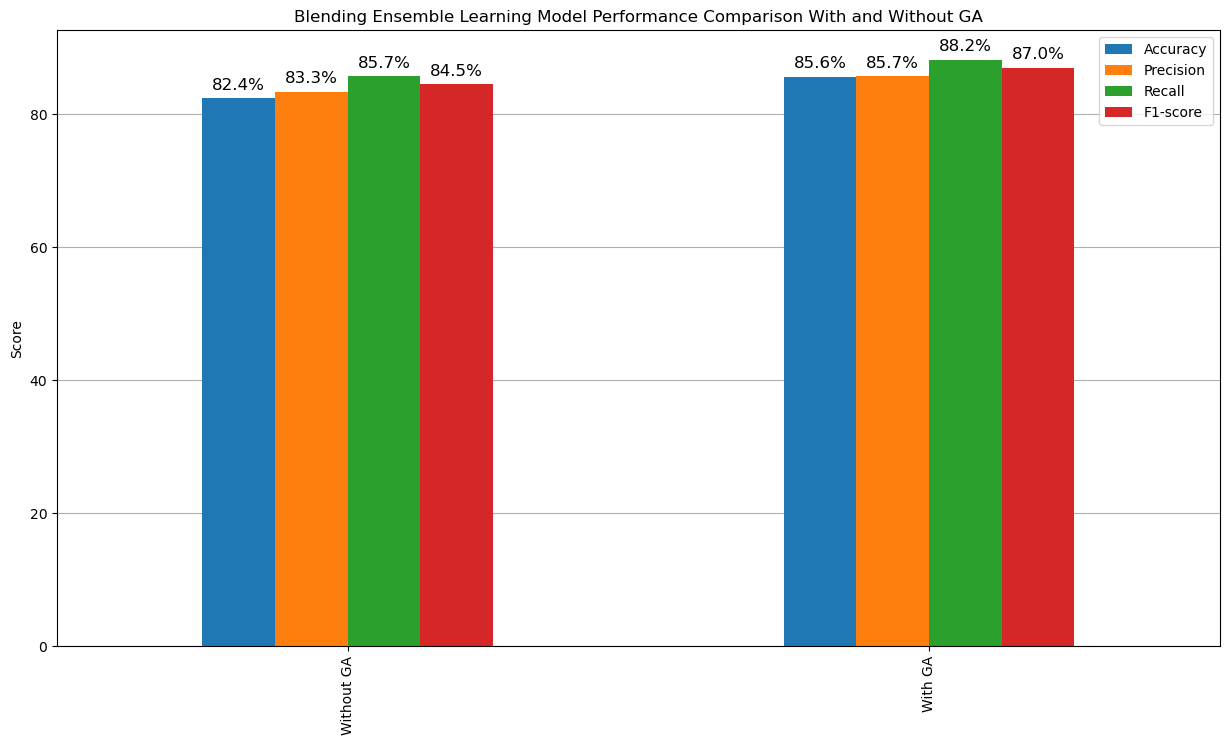

In [52]:
### Plotting bar chart: Compare Blending EL performance without and with GA ###

plotdata = pd.DataFrame({

    "Accuracy":[bl_acc1, bl_acc2],

    "Precision":[bl_pre1, bl_pre2],

    "Recall":[bl_re1, bl_re2],

    "F1-score":[bl_fs1, bl_fs2]

    },

    index=["Without GA", "With GA"])

ax = plotdata.plot(kind="bar",figsize=(15, 8), grid = False)
# Customize the grid
ax.grid(axis = "y")
# Set the gridlines behind the plot
ax.set_axisbelow(True)

#Annotate text in bar plot
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
            '{:,.1f}'.format(bar.get_height())+ "%",
            ha='center', va='center',
            size=12 )

plt.title("Blending Ensemble Learning Model Performance Comparison With and Without GA")

plt.ylabel("Score")

###### Summary:
Genetic algorithm increased the performance of the blending ensemble learning model.


###### Performance Comparison RQ1:

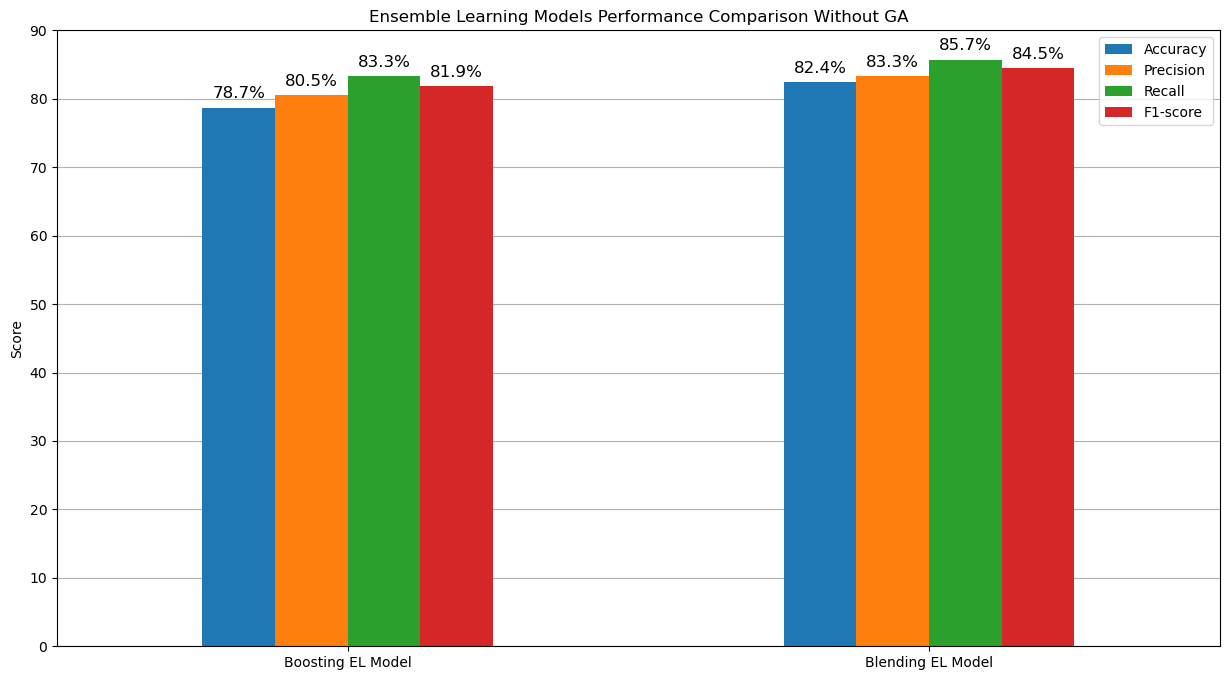

In [53]:
### Plot bar chart: Compare Boosting and Blending EL performance without GA ###

plotdata = pd.DataFrame({

    "Accuracy":[bo_acc1, bl_acc1],

    "Precision":[bo_pre1, bl_pre1],

    "Recall":[bo_re1, bl_re1],

    "F1-score":[bo_fs1, bl_fs1]

    },


    index=["Boosting EL Model", "Blending EL Model"])

ax = plotdata.plot(kind="bar",figsize=(15, 8), rot=0, grid = False)
# Customize the grid
ax.grid(axis = "y")
# Set the gridlines behind the plot
ax.set_axisbelow(True)

#Annotate text in bar plot
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
            '{:,.1f}'.format(bar.get_height())+ "%",
            ha='center', va='center',
            size=12 )

# Setting title for plot
plt.title("Ensemble Learning Models Performance Comparison Without GA")
# adjust location of the legend in second subplot
plt.legend(loc='upper right')
plt.ylabel("Score")

plt.show()

###### Summary:
Without genetic algorithm, the performance of blending ensemble learning model was significantly increased than the performance of AdaBoost ensemble learning model.


###### Performance Comparison RQ4:

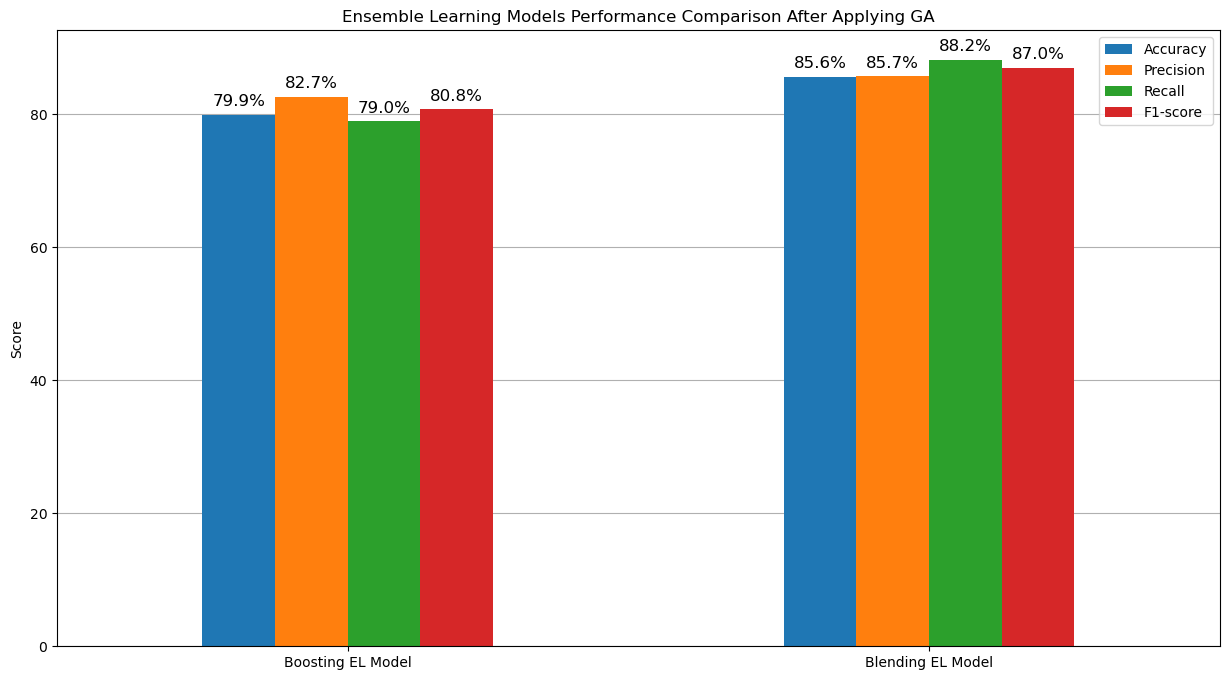

In [54]:
### Plot bar chart: Compare Boosting and Blending EL performance with GA ###

plotdata = pd.DataFrame({

    "Accuracy":[bo_acc2, bl_acc2],

    "Precision":[bo_pre2, bl_pre2],

    "Recall":[bo_re2, bl_re2],

    "F1-score":[bo_fs2, bl_fs2]

    },


    index=["Boosting EL Model", "Blending EL Model"])

ax = plotdata.plot(kind="bar",figsize=(15, 8), rot=0, grid = False)
# Customize the grid
ax.grid(axis = "y")
# Set the gridlines behind the plot
ax.set_axisbelow(True)

#Annotate text in bar plot
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
            '{:,.1f}'.format(bar.get_height())+ "%",
            ha='center', va='center',
            size=12 )

# Setting title for plot
plt.title("Ensemble Learning Models Performance Comparison After Applying GA")
# adjust location of the legend in second subplot
plt.legend(loc='upper right')
plt.ylabel("Score")

plt.show()

###### Summary:
After applying genetic algorithm, the performance of blending ensemble learning model massively increased as compared to the performance of AdaBoost ensemble learning model.


###### Main Performance Comparison (RQ1, RQ2, RQ3 and RQ4):

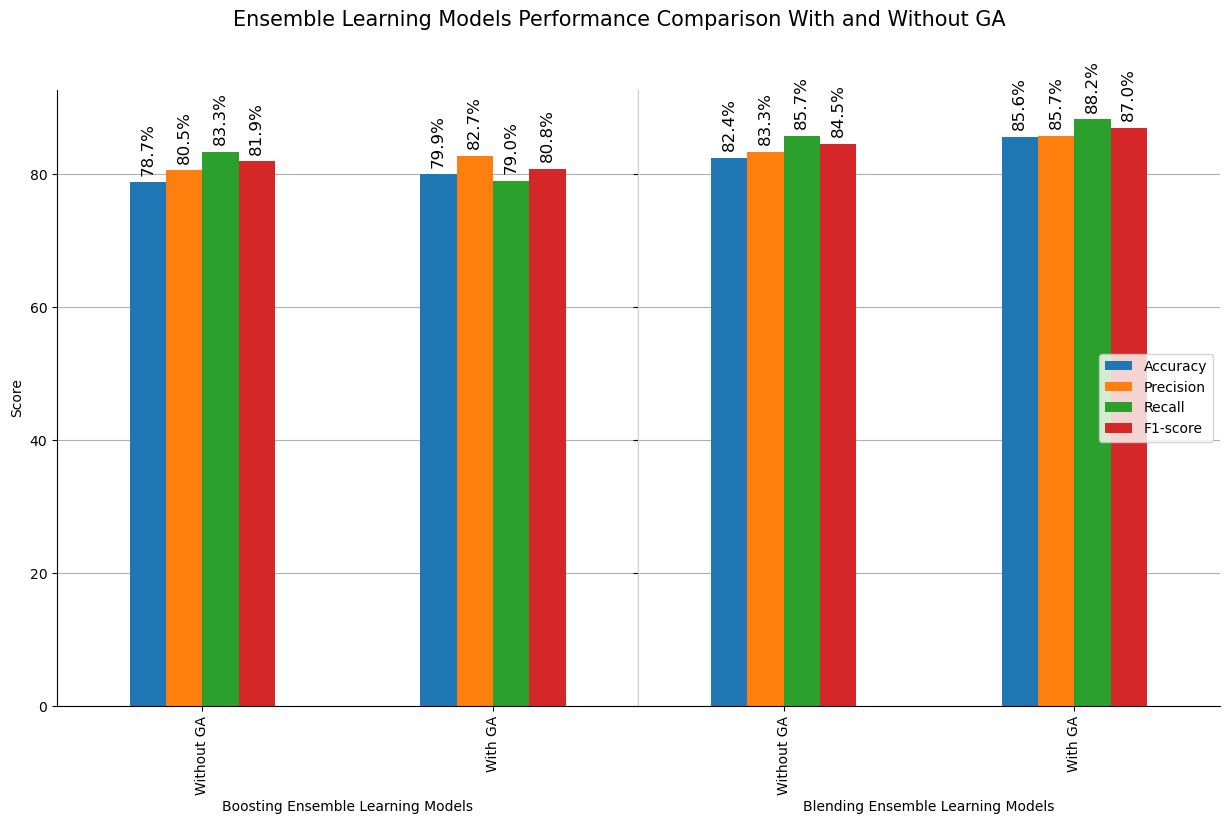

In [55]:
### Plot Bar chart to compare Boosting and Blending EL with and without GA ###

# Initialise the subplot function using number of rows and columns
fig = plt.figure()
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')

# Setting title for plot
fig.suptitle('Ensemble Learning Models Performance Comparison With and Without GA', size=15, y=0.98)

plotdata1 = pd.DataFrame({

    "Accuracy":[bo_acc1, bo_acc2],

    "Precision":[bo_pre1, bo_pre2],

    "Recall":[bo_re1, bo_re2],

    "F1-score":[bo_fs1, bo_fs2]

    },

    index=["Without GA", "With GA"])

bar1 = plotdata1.plot(kind="bar",figsize=(15, 8), ax=ax1, grid = False)
# Customize the grid
bar1.grid(axis = "y")
# Set the gridlines behind the plot
bar1.set_axisbelow(True)


plotdata2 = pd.DataFrame({

    "Accuracy":[bl_acc1, bl_acc2],

    "Precision":[bl_pre1, bl_pre2],

    "Recall":[bl_re1, bl_re2],

    "F1-score":[bl_fs1, bl_fs2]

    },

    index=["Without GA", "With GA"])

bar2 = plotdata2.plot(kind="bar",figsize=(15, 8), ax=ax2, grid = False)
# Customize the grid
bar2.grid(axis = "y")
# Set the gridlines behind the plot
bar2.set_axisbelow(True)

#Annotate text in bar plot
for bar in bar1.patches:
    bar1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
            '{:,.1f}'.format(bar.get_height())+ "%",
              rotation = 90,
              ha='center', va='center',
              size=12 )


for bar in bar2.patches:
    bar2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
            '{:,.1f}'.format(bar.get_height())+ "%",
              ha='center', va='center',
              rotation = 90,
              size=12 )


# remove legend from first subplot
ax1.get_legend().remove()

# remove frame (border) from a figure
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# making the center frame light color
ax2.spines['left'].set_color('lightgrey')

# adjust location of the legend in second subplot
ax2.legend(loc='center right')
ax1.set_ylabel("Score")
ax1.set_xlabel("Boosting Ensemble Learning Models")
ax2.set_xlabel("Blending Ensemble Learning Models")

plt.show()

###### Final Summary:
Without genetic algorithm, the performance of blending ensemble learning model was significantly better than the boosting (AdaBoost) ensemble learning model (RQ1). After applying genetic algorithm, the performance of blending ensemble learning model was even more considerably better than the boosting ensemble learning model (RQ4). Therefore, it has been proved that the blending ensemble learning model is best for predicting heart disease as compared to boosting, especially with genetic algorithm.

The use of genetic algorithm affected the performance of both EL models. The performance of boosting ensemble learning model have been slightly increased due to genetic algorithm (RQ2). However, genetic algorithm massively increased the performance of the blending ensemble learning model (RQ3). Therefore, it has been proved that the genetic algorithm have a massive impact on blending ensemble learning model and a slightly positive affect on the boosting ensemble learning model.